---
title: "AM Peak travel distance skim for SOV NT"
format: 
  html: 
    toc: true
    css: styles.css
jupyter: python3
execute:
  echo: false
---

In [1]:
from util import Skim
from config import scenarioPath_OpenPath
from config import scenarioPath_EMME437

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

Scatterplot comparison of AM Peak SOV_NT distance

Intercept: 0.0058
Slope: 1.0004
R² Score: 0.9997
RMSE: 0.2742


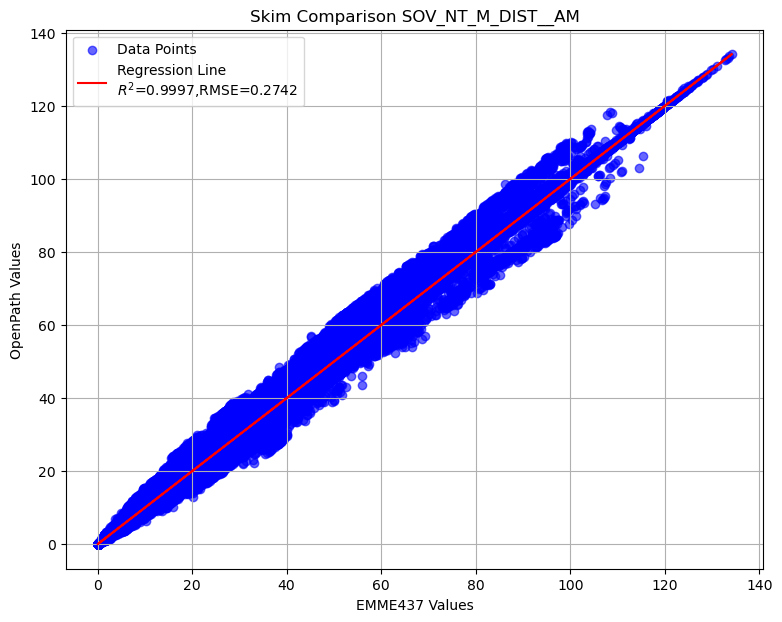

In [3]:
Skim.regression_scatter_plot('SOV_NT_M_DIST__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')

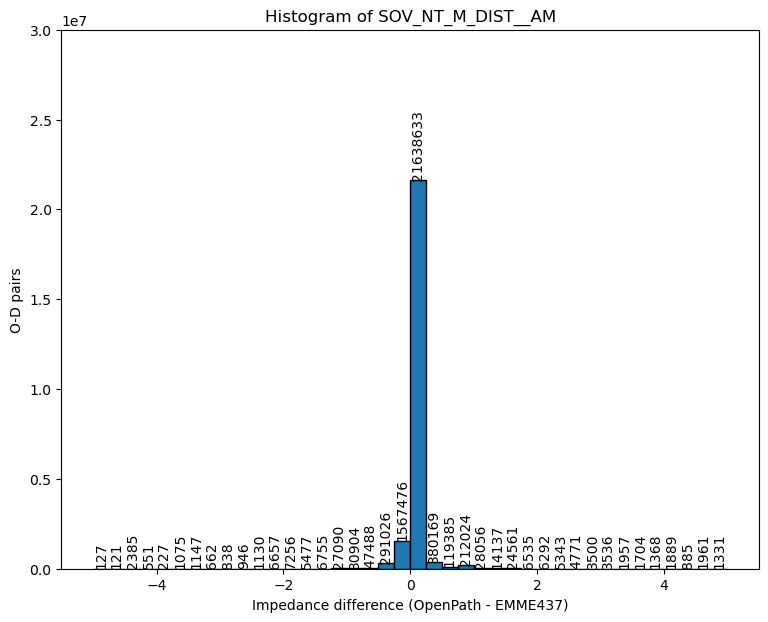

In [4]:
Skim.histogram_plot('SOV_NT_M_DIST__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')

Comparison table of select matrix from AM Peak traffic skim (top 5)

In [7]:
comparison = Skim.comparison(scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')
comparison.sort_values(by='SOV_NT_M_DIST__AM', ascending=False).head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index").format({
    'SOV_NT_M_DIST__AM': '{:,.2f}'
})

Origin,Destination,SOV_NT_M_DIST__AM
4908,1383,12.41
535,71,11.90
489,71,11.59
4762,4521,11.15
4867,1108,11.04


Summary of Comparison on SOV_NT_M_DIST__AM between EMME OpenPath and EMME437

In [15]:
desc = comparison[['SOV_NT_M_DIST__AM']].describe().applymap(lambda x: f"{x:,.2f}")
print(desc)

      SOV_NT_M_DIST__AM
count     24,472,809.00
mean               0.02
std                0.27
min              -12.57
25%                0.00
50%                0.00
75%                0.00
max               12.41
